In [6]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Perform hierarchical clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
cluster_labels = agg_cluster.fit_predict(X)


In [7]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)
print("The average silhouette score for the clusters is:", silhouette_avg)


The average silhouette score for the clusters is: 0.5543236611296419


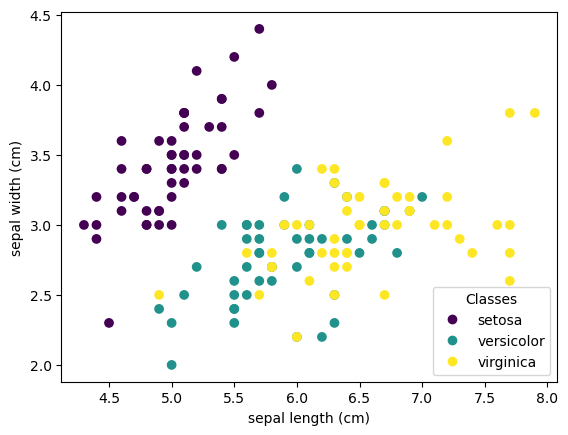

In [8]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)


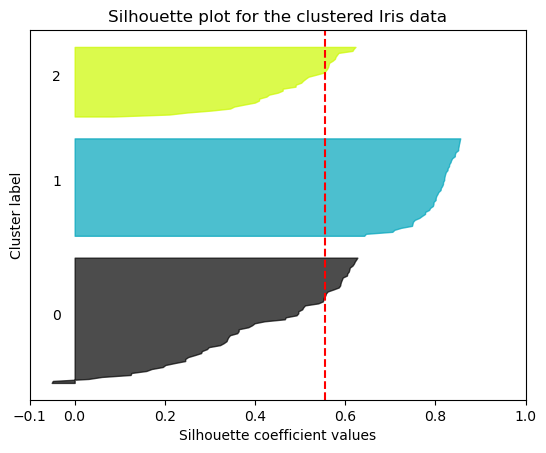

In [9]:
from sklearn.metrics import silhouette_samples
import numpy as np

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)

# Plotting
fig, ax = plt.subplots()
y_lower = 10
for i in range(3):
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / 3)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for the next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax.set_title("Silhouette plot for the clustered Iris data")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()


In [1]:
# q2.2
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame from the Iris dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Select the "petal width" and "petal length" features
X = df[['petal width (cm)', 'petal length (cm)']]


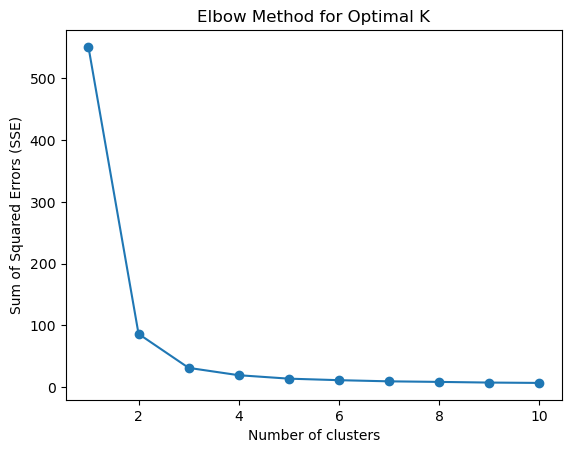

In [2]:


# q2.2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame from the Iris dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Select the "petal width" and "petal length" features
X = df[['petal width (cm)', 'petal length (cm)']]

# Define the range of clusters to try
k_range = range(1, 11)
sse = []

# Perform K-means clustering for each value of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal K')
plt.show()


In [3]:
print(np.max(iris.data))
print(np.min(iris.data))

NameError: name 'np' is not defined

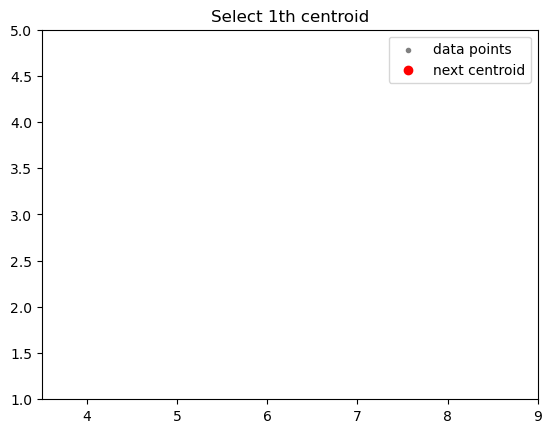

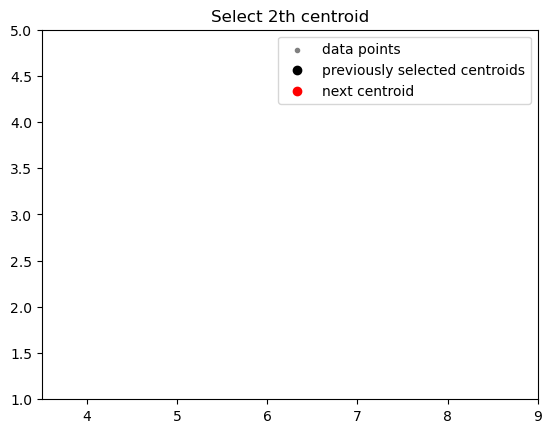

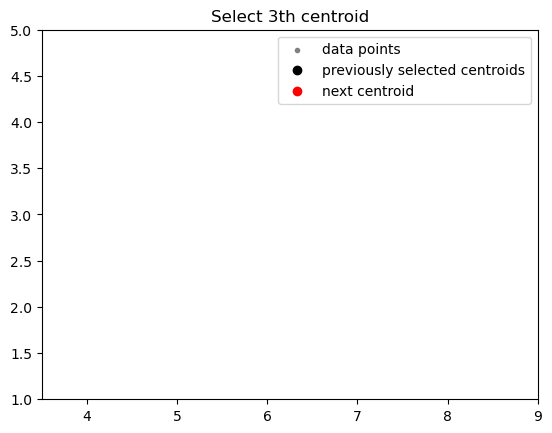

[array([0.2, 1.4]), array([2.3, 6.9]), array([1.2, 4.2])]

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
import sys

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Select the "petal width" and "petal length" features
data = df[['petal width (cm)', 'petal length (cm)']].values

# Function to compute Euclidean distance
def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Function to plot data points and centroids
def plot(data, centroids):
    plt.scatter(data[:, 0], data[:, 1], marker='.', color='gray', label='data points')
    if len(centroids) > 1:
        plt.scatter(centroids[:-1, 0], centroids[:-1, 1], color='black', label='previously selected centroids')
    plt.scatter(centroids[-1, 0], centroids[-1, 1], color='red', label='next centroid')
    plt.title(f'Select {centroids.shape[0]}th centroid')
    plt.legend()
    plt.xlim(0, 3)
    plt.ylim(0, 8) 
    plt.xlabel('Petal Width (cm)')
    plt.ylabel('Petal Length (cm)')
    plt.show()

# Initialization algorithm
def initialize(data, k):
    '''
    Initializes the centroids for K-means++
    inputs:
        data - numpy array of data points having shape (n, d)
        k - number of clusters
    '''
    # Initialize the centroids list and add a randomly selected data point to the list
    centroids = []
    centroids.append(data[np.random.randint(data.shape[0]), :])
    plot(data, np.array(centroids))

    # Compute remaining k - 1 centroids
    for c_id in range(k - 1):
        # Initialize a list to store distances of data points from nearest centroid
        dist = []
        for i in range(data.shape[0]):
            point = data[i, :]
            d = sys.maxsize

            # Compute distance of 'point' from each of the previously selected centroids and store the minimum distance
            for j in range(len(centroids)):
                temp_dist = distance(point, centroids[j])
                d = min(d, temp_dist)
            dist.append(d)

        # Select data point with maximum distance as our next centroid
        dist = np.array(dist)
        next_centroid = data[np.argmax(dist), :]
        centroids.append(next_centroid)
        plot(data, np.array(centroids))

    return np.array(centroids)

# Run the initialization algorithm and plot the centroids step-by-step
initialize(data, 3)  # Adjust the number of clusters as needed


In [15]:
from sklearn.cluster import KMeans

# Specify the number of clusters (use the optimal value obtained from the Elbow method or any other method)
num_clusters = 3

# Initialize KMeans object with K-means++ initialization
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)

# Perform K-means clustering
kmeans.fit(X)

# Get cluster labels and centroids
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

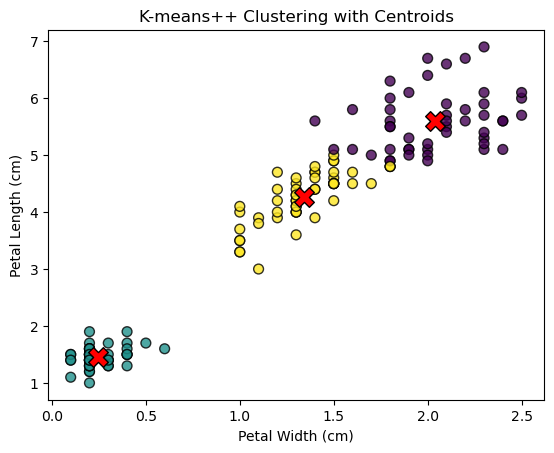

In [16]:
import matplotlib.pyplot as plt

# Plot the clustered data points
plt.scatter(X['petal width (cm)'], X['petal length (cm)'], c=cluster_labels, cmap='viridis', edgecolor='k', s=50, alpha=0.8)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', c='red', s=200, edgecolor='k')

# Add labels and title
plt.xlabel('Petal Width (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('K-means++ Clustering with Centroids')

# Show plot

plt.show()


In [17]:
from sklearn.cluster import DBSCAN

# Specify the parameters for DBSCAN
epsilon_1 = 0.2
min_samples = 4

# Initialize DBSCAN object
dbscan_1 = DBSCAN(eps=epsilon_1, min_samples=min_samples)

# Perform DBSCAN clustering
cluster_labels_1 = dbscan_1.fit_predict(X)


In [18]:
# Specify the parameters for DBSCAN
epsilon_2 = 0.5

# Initialize DBSCAN object
dbscan_2 = DBSCAN(eps=epsilon_2, min_samples=min_samples)

# Perform DBSCAN clustering
cluster_labels_2 = dbscan_2.fit_predict(X)
print(cluster_labels_2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


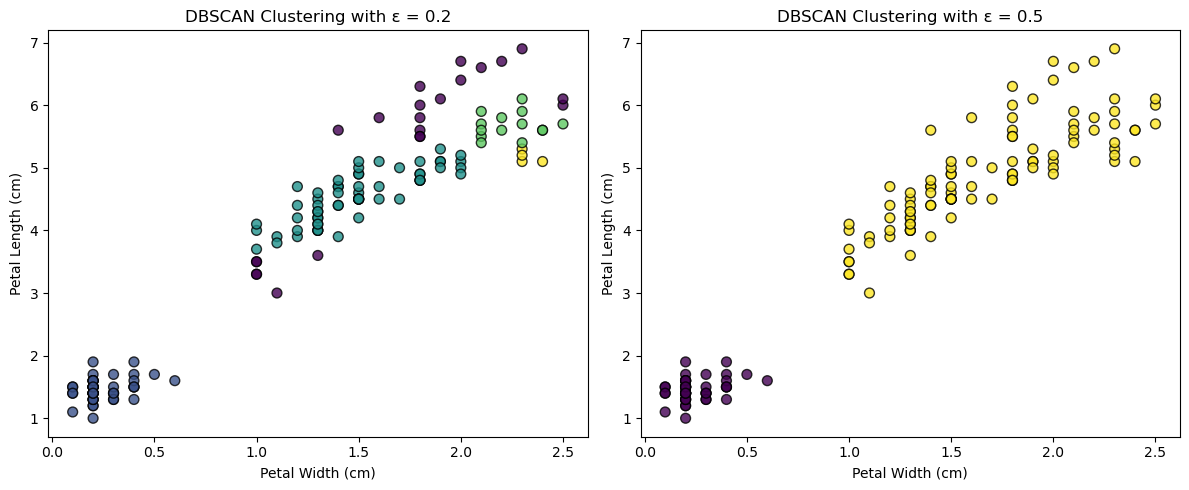

In [19]:
import matplotlib.pyplot as plt

# Plot the clustered data points for ε = 0.2
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X['petal width (cm)'], X['petal length (cm)'], c=cluster_labels_1, cmap='viridis', edgecolor='k', s=50, alpha=0.8)
plt.title(f'DBSCAN Clustering with ε = {epsilon_1}')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Petal Length (cm)')

# Plot the clustered data points for ε = 0.5
plt.subplot(1, 2, 2)
plt.scatter(X['petal width (cm)'], X['petal length (cm)'], c=cluster_labels_2, cmap='viridis', edgecolor='k', s=50, alpha=0.8)
plt.title(f'DBSCAN Clustering with ε = {epsilon_2}')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Petal Length (cm)')

plt.tight_layout()
plt.show()

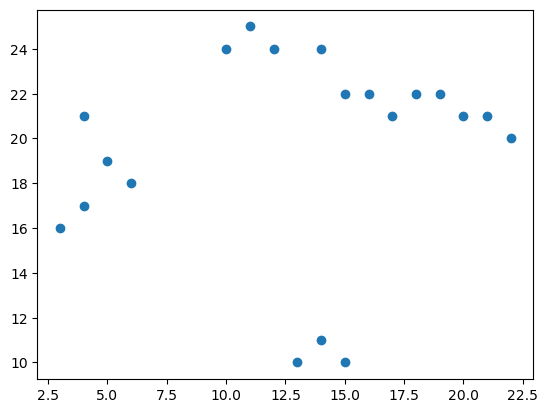

In [20]:
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 ,16,17,21,12,6,22,20,19,15,14,13,15 ,18]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21,24,18,20,21,22,10,11,10,22,22]

plt.scatter(x, y)
plt.show()

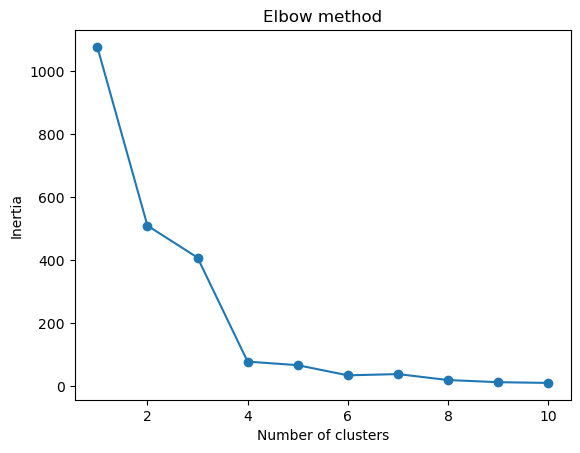

In [21]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

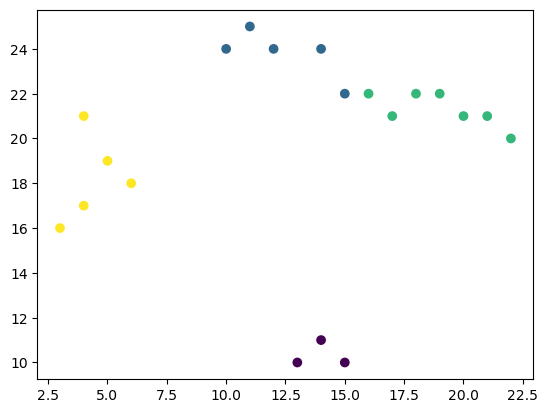

In [22]:
# K-mean
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

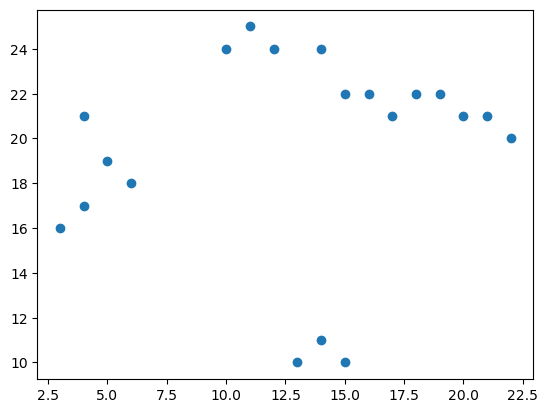

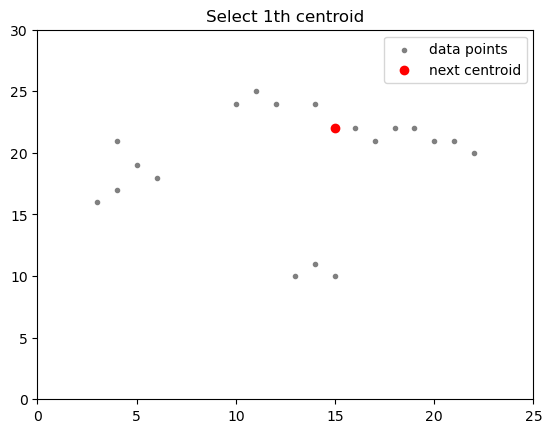

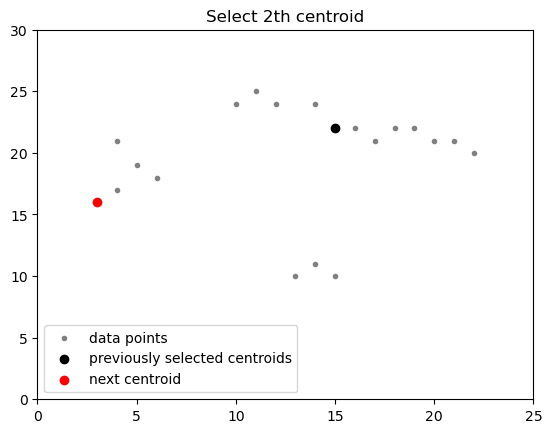

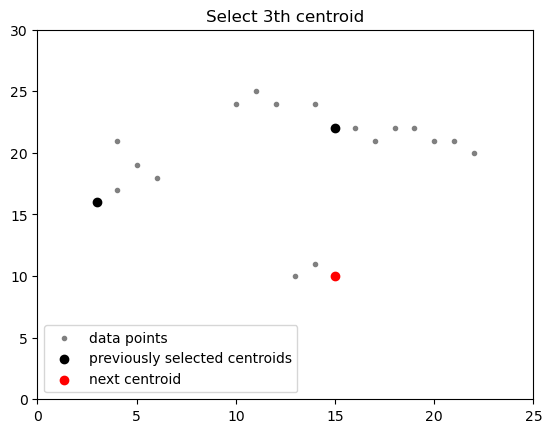

[array([15, 22]), array([ 3, 16]), array([15, 10])]

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import sys
# k-means++ 
data = np.array(list(zip(x, y)))

# Function to compute Euclidean distance
def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Function to plot data points and centroids
def plot(data, centroids):
    plt.scatter(data[:, 0], data[:, 1], marker='.', color='gray', label='data points')
    if len(centroids) > 1:
        plt.scatter(centroids[:-1, 0], centroids[:-1, 1], color='black', label='previously selected centroids')
    plt.scatter(centroids[-1, 0], centroids[-1, 1], color='red', label='next centroid')
    plt.title(f'Select {centroids.shape[0]}th centroid')
    plt.legend()
    plt.xlim(0, 25)
    plt.ylim(0, 30)
    plt.show()

# Initialization algorithm
def initialize(data, k):
    '''
    Initializes the centroids for K-means++
    inputs:
        data - numpy array of data points having shape (n, 2)
        k - number of clusters
    '''
    # Initialize the centroids list and add a randomly selected data point to the list
    centroids = []
    centroids.append(data[np.random.randint(data.shape[0]), :])
    plot(data, np.array(centroids))

    # Compute remaining k - 1 centroids
    for c_id in range(k - 1):
        # Initialize a list to store distances of data points from nearest centroid
        dist = []
        for i in range(data.shape[0]):
            point = data[i, :]
            d = sys.maxsize

            # Compute distance of 'point' from each of the previously selected centroids and store the minimum distance
            for j in range(len(centroids)):
                temp_dist = distance(point, centroids[j])
                d = min(d, temp_dist)
            dist.append(d)

        # Select data point with maximum distance as our next centroid
        dist = np.array(dist)
        next_centroid = data[np.argmax(dist), :]
        centroids.append(next_centroid)
        plot(data, np.array(centroids))

    return centroids

# Plot the initial data points
plt.scatter(x, y)
plt.show()

# Run the initialization algorithm and plot the centroids step-by-step
initialize(data, 3)


In [24]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(X)
plt.figure(figsize=(10, 6))
plt.scatter(X[clusters == 0, 0], X[clusters == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[clusters == 1, 0], X[clusters == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[clusters == 2, 0], X[clusters == 2, 1], s=100, c='green', label='Cluster 3')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='yellow', label='Centroids', edgecolors='black', marker='o')

plt.title('K-means++ Clustering of Iris Dataset')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()


InvalidIndexError: (array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False]), 0)

<Figure size 1000x600 with 0 Axes>

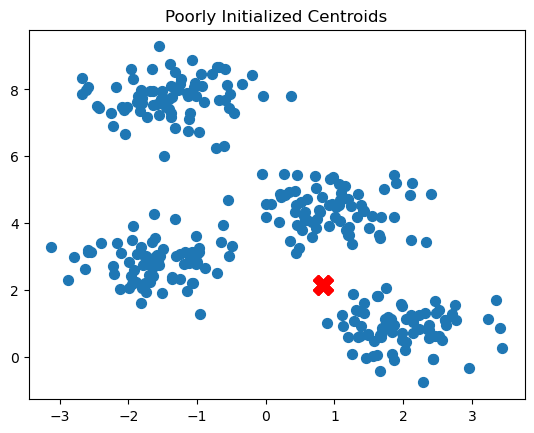

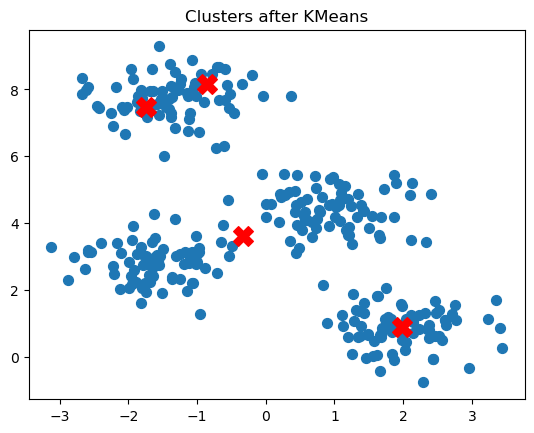

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate sample data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Number of clusters
k = 4

# Poor initialization of centroids (all centroids at the same point)
initial_centroid = X[0]
centroids = np.array([initial_centroid for _ in range(k)])

def plot_clusters(X, centroids, title):
    plt.scatter(X[:, 0], X[:, 1], s=50)
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')
    plt.title(title)
    plt.show()

plot_clusters(X, centroids, "Poorly Initialized Centroids")

# You would then proceed with the k-means algorithm
# to see how poorly it performs with these initial centroids

from sklearn.cluster import KMeans

# Perform KMeans with poorly initialized centroids
kmeans = KMeans(n_clusters=k, init=centroids, n_init=1)
kmeans.fit(X)

# Plot the resulting clusters
plot_clusters(X, kmeans.cluster_centers_, "Clusters after KMeans")

# This demonstrates the poor performance due to bad centroid initialization
